In [1]:
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib
cmap = matplotlib.colormaps['viridis']

In [3]:
variable_df = pd.read_csv('data/results_variable_2.csv', sep='\t',
                             converters= {'GWM_S_predict_local': literal_eval,
                                          'Local_S_predict_local': literal_eval,
                                          'S_i_plus_1_classic': literal_eval,
                                          'S0': literal_eval
                                          })

In [4]:
variable_df.columns

Index(['q', 'total_sim_time', 'S0', 'well_loc_idx', 'well_loc', 'P_imp',
       'GWM_S_predict_local', 'Local_S_predict_local', 'P_i_plus_1_classic',
       'S_i_plus_1_classic', 'nb_newton_classic', 'dt_sim_classic',
       'norms_classic', 'GWM_S_i_plus_1_hybrid', 'GWM_P_i_plus_1_hybrid',
       'GWM_nb_newton_hybrid', 'GWM_dt_sim_hybrid', 'GWM_norms_hybrid',
       'Local_S_i_plus_1_hybrid', 'Local_P_i_plus_1_hybrid',
       'Local_nb_newton_hybrid', 'Local_dt_sim_hybrid', 'Local_norms_hybrid',
       'S_DD_local', 'P_DD_local', 'S_i_plus_1_DD', 'P_i_plus_1_DD',
       'nb_newton_DD', 'dt_sim_DD', 'norms_DD'],
      dtype='object')

In [9]:
i = 0

56


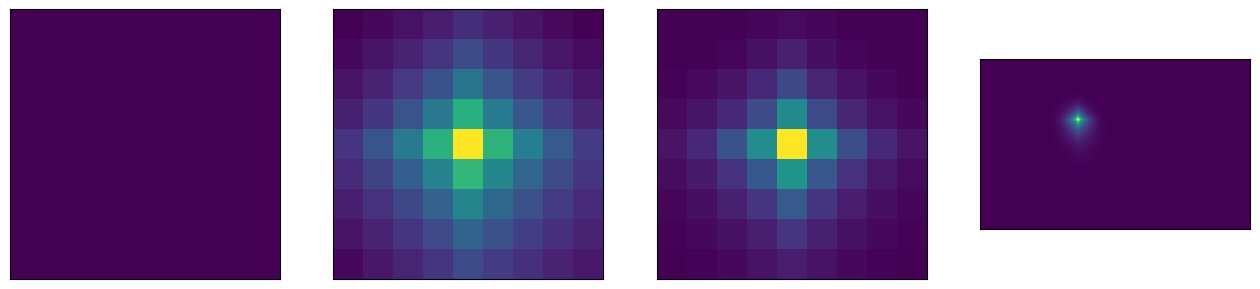

In [66]:
sample = variable_df.loc[i]
print(i)
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(np.full((9,9), sample['S0']))
axs[1].imshow(np.array(sample['Local_S_predict_local']).reshape(9, 9).T)
axs[2].imshow(np.array(sample['GWM_S_predict_local']).reshape(9, 9).T)
axs[3].imshow(np.array(sample['S_i_plus_1_classic']).reshape(95, 60).T)

for ax in axs:
    ax.invert_yaxis()
    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.show()
i+=1